# Librerias Necesarias

In [44]:
import pandas as pd
import numpy as np
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

# Base de datos obtenida de los experimientos

In [70]:
data = pd.read_csv("data_base/database.csv")

C:\Users\kapla\AppData\Local\Temp\ipykernel_13472\1432053857.py:1: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data_base/database.csv")


Columnas de la base de datos

In [91]:
data.columns

Index(['_id', 'stime', 'proto', 'proto_number', 'saddr', 'sport', 'daddr',
       'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime', 'dur',
       'spkts', 'dpkts', 'sbytes', 'dbytes', 'TnBPSrcIP', 'TnBPDstIP',
       'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport',
       'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
       'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'tag',
       'attack_tool', 'attack_param', 'prediction_dt', 'time_prediction_dt',
       'prediction_lr', 'time_prediction_lr', 'prediction_rf',
       'time_prediction_rf', 'prediction_svm_linear',
       'time_prediction_svm_linear'],
      dtype='object')

Registros de la base de datos

In [92]:
data

,_id,stime,proto,proto_number,saddr,sport,daddr,dport,pkts,bytes,state,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,tag,attack_tool,attack_param,prediction_dt,time_prediction_dt,prediction_lr,time_prediction_lr,prediction_rf,time_prediction_rf,prediction_svm_linear,time_prediction_svm_linear
0,ObjectId(636582c0b8646dba914e2c89),1.667597e+09,tcp,1,192.168.100.200,43098,192.168.100.201,22,2,288,CON,0,1.667597e+09,0.000260,1,1,66,222,22910,816,96,8,168,10,3.457078,267.567477,3,19,7692.307692,334.280461,0,NaN,NaN,0,0.005265,0,0.003315,0,0.031133,0,0.002953
1,ObjectId(636582c0b8646dba914e2c8a),1.667597e+09,tcp,1,192.168.100.200,54344,192.168.100.217,80,3,388,CON,0,1.667597e+09,0.000258,1,2,66,322,22910,22140,96,88,168,118,3.457078,3.235249,14,19,13513.513514,3.773346,0,NaN,NaN,0,0.005265,0,0.003315,0,0.031133,0,0.002953
2,ObjectId(636582c0b8646dba914e2c8b),1.667597e+09,tcp,1,192.168.100.200,54338,192.168.100.217,80,15,4442,CON,0,1.667597e+09,2.739307,5,10,2346,2096,22910,22140,96,88,168,118,3.457078,3.235249,14,19,3.089279,3.773346,0,NaN,NaN,0,0.005265,0,0.003315,0,0.031133,0,0.002953
3,ObjectId(636582c0b8646dba914e2c8c),1.667597e+09,tcp,1,192.168.100.200,54348,192.168.100.217,80,3,576,CON,0,1.667597e+09,0.000203,1,2,66,510,22910,22140,96,88,168,118,3.457078,3.235249,14,19,182.826498,3.773346,0,NaN,NaN,0,0.005265,0,0.003315,0,0.031133,0,0.002953
4,ObjectId(636582c0b8646dba914e2c8d),1.667597e+09,arp,0,192.168.100.18,-1,192.168.100.18,-1,1,60,INT,1,1.667597e+09,0.000001,1,0,60,0,60,60,1,1,13,24,1000000.000000,1000000.000000,1,1,1.878154,1.878154,0,NaN,NaN,0,0.005265,0,0.003315,0,0.031133,0,0.002953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595495,ObjectId(63768bad4195798d19099085),1.668713e+09,arp,0,192.168.100.22,-1,192.168.100.22,-1,2,120,CON,0,1.668713e+09,2.483446,1,1,60,60,120,120,2,2,16,34,0.805333,0.805333,1,1,1.567544,1.567544,0,NaN,NaN,0,0.003190,1,0.003136,0,0.030439,1,0.003505
3595496,ObjectId(63768bad4195798d19099086),1.668713e+09,ipv6-icmp,3,fe80::ca63:14ff:fe70:c9c2,133,ff02::2,-1,2,124,NRS,3,1.668713e+09,4.730644,2,0,124,0,124,876,2,14,14,34,0.422775,0.823749,10,1,0.823749,0.823749,0,NaN,NaN,0,0.003190,1,0.003136,1,0.030439,1,0.003505
3595497,ObjectId(63768bad4195798d19099087),1.668713e+09,tcp,1,192.168.100.201,38056,188.172.244.148,5938,3,222,REQ,6,1.668713e+09,3.020596,3,0,222,0,2053476,1211,1451,11,2321,15,26.079614,2.614645,2,35,0.993181,0.989966,0,NaN,NaN,1,0.003190,1,0.003136,1,0.030439,1,0.003505
3595498,ObjectId(63768bad4195798d19099088),1.668713e+09,udp,2,192.168.100.139,5353,224.0.0.251,5353,1,422,REQ,6,1.668713e+09,0.000001,1,0,422,0,844,10357,2,35,82,35,1000000.000000,3.748554,20,2,3.748554,3.748554,0,NaN,NaN,1,0.003190,1,0.003136,1,0.030439,1,0.003505


Características que describen a los registros del tráfico de red (X_data con 23 funciones) 

In [94]:
X_data = data.loc[:, ['stime', 'proto_number', 'pkts', 'bytes', 'state_number', 'ltime',
                        'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'TnBPSrcIP', 'TnBPDstIP',
                        'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport',
                        'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
                        'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport']]
X_data

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
0,1.667597e+09,1,2,288,0,1.667597e+09,0.000260,1,1,66,222,22910,816,96,8,168,10,3.457078,267.567477,3,19,7692.307692,334.280461
1,1.667597e+09,1,3,388,0,1.667597e+09,0.000258,1,2,66,322,22910,22140,96,88,168,118,3.457078,3.235249,14,19,13513.513514,3.773346
2,1.667597e+09,1,15,4442,0,1.667597e+09,2.739307,5,10,2346,2096,22910,22140,96,88,168,118,3.457078,3.235249,14,19,3.089279,3.773346
3,1.667597e+09,1,3,576,0,1.667597e+09,0.000203,1,2,66,510,22910,22140,96,88,168,118,3.457078,3.235249,14,19,182.826498,3.773346
4,1.667597e+09,0,1,60,1,1.667597e+09,0.000001,1,0,60,0,60,60,1,1,13,24,1000000.000000,1000000.000000,1,1,1.878154,1.878154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595495,1.668713e+09,0,2,120,0,1.668713e+09,2.483446,1,1,60,60,120,120,2,2,16,34,0.805333,0.805333,1,1,1.567544,1.567544
3595496,1.668713e+09,3,2,124,3,1.668713e+09,4.730644,2,0,124,0,124,876,2,14,14,34,0.422775,0.823749,10,1,0.823749,0.823749
3595497,1.668713e+09,1,3,222,6,1.668713e+09,3.020596,3,0,222,0,2053476,1211,1451,11,2321,15,26.079614,2.614645,2,35,0.993181,0.989966
3595498,1.668713e+09,2,1,422,6,1.668713e+09,0.000001,1,0,422,0,844,10357,2,35,82,35,1000000.000000,3.748554,20,2,3.748554,3.748554


In [95]:
X_data.describe()

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
count,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06
mean,1.668256e+09,1.006761e+00,2.816293e+01,3.460066e+04,3.190650e+00,1.668256e+09,1.601203e+00,1.396528e+01,1.425950e+01,7.451328e+03,2.981667e+04,3.795212e+05,2.674564e+05,1.212005e+03,1.176131e+03,1.736664e+03,1.203814e+03,2.613167e+04,1.975485e+04,9.238908e+01,9.162281e+01,2.817799e+04,3.671393e+04
std,3.962576e+05,2.462850e-01,8.713717e+02,1.029667e+06,2.313470e+00,3.962575e+05,1.814557e+00,8.223049e+02,1.948982e+02,1.261408e+06,8.207361e+05,4.801200e+06,3.223903e+06,2.135068e+03,1.730757e+03,4.283911e+03,2.259705e+03,1.807607e+05,1.612997e+05,2.093585e+01,2.238585e+01,2.052202e+05,2.424801e+05
min,1.667597e+09,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.667597e+09,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,6.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.058582e-01,4.058582e-01,1.000000e+00,1.000000e+00,4.058582e-01,4.058582e-01
25%,1.668099e+09,1.000000e+00,9.000000e+00,5.400000e+02,2.000000e+00,1.668099e+09,3.279000e-03,4.000000e+00,4.000000e+00,2.400000e+02,2.400000e+02,6.000000e+04,5.940000e+04,8.290000e+02,8.280000e+02,9.210000e+02,8.220000e+02,3.705305e+00,3.575434e+00,9.600000e+01,9.600000e+01,3.371642e+00,3.604550e+00
50%,1.668185e+09,1.000000e+00,1.400000e+01,2.214000e+03,2.000000e+00,1.668185e+09,7.673750e-01,5.000000e+00,8.000000e+00,6.920000e+02,1.448000e+03,2.100790e+05,2.105760e+05,1.344000e+03,1.352000e+03,1.399000e+03,1.350000e+03,1.392208e+01,1.355407e+01,9.900000e+01,9.900000e+01,1.688898e+01,1.395303e+01
75%,1.668680e+09,1.000000e+00,1.500000e+01,2.298000e+03,7.000000e+00,1.668680e+09,3.582655e+00,6.000000e+00,1.000000e+01,7.680000e+02,1.576000e+03,2.257140e+05,2.259090e+05,1.455000e+03,1.455000e+03,1.497000e+03,1.455000e+03,8.005570e+01,6.806589e+01,1.000000e+02,1.000000e+02,3.355705e+03,7.738834e+01
max,1.668713e+09,4.000000e+00,4.901290e+05,2.759905e+08,1.500000e+01,1.668713e+09,6.018517e+01,4.901290e+05,3.399500e+04,8.077562e+08,2.741219e+08,3.698772e+08,3.698346e+08,4.901290e+05,4.901290e+05,4.901290e+05,4.901290e+05,3.000000e+06,3.000000e+06,1.000000e+02,1.000000e+02,5.000000e+06,3.000000e+06


In [96]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3595500 entries, 0 to 3595499
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   stime               float64
 1   proto_number        int64  
 2   pkts                int64  
 3   bytes               int64  
 4   state_number        int64  
 5   ltime               float64
 6   dur                 float64
 7   spkts               int64  
 8   dpkts               int64  
 9   sbytes              int64  
 10  dbytes              int64  
 11  TnBPSrcIP           int64  
 12  TnBPDstIP           int64  
 13  TnP_PSrcIP          int64  
 14  TnP_PDstIP          int64  
 15  TnP_PerProto        int64  
 16  TnP_Per_Dport       int64  
 17  AR_P_Proto_P_SrcIP  float64
 18  AR_P_Proto_P_DstIP  float64
 19  N_IN_Conn_P_DstIP   int64  
 20  N_IN_Conn_P_SrcIP   int64  
 21  AR_P_Proto_P_Sport  float64
 22  AR_P_Proto_P_Dport  float64
dtypes: float64(7), int64(16)
memory usage: 630.9 MB


Etiqueta de los datos obtenida (Y_data)

In [97]:
data.tag.value_counts()

1    3254077
0     341423
Name: tag, dtype: int64

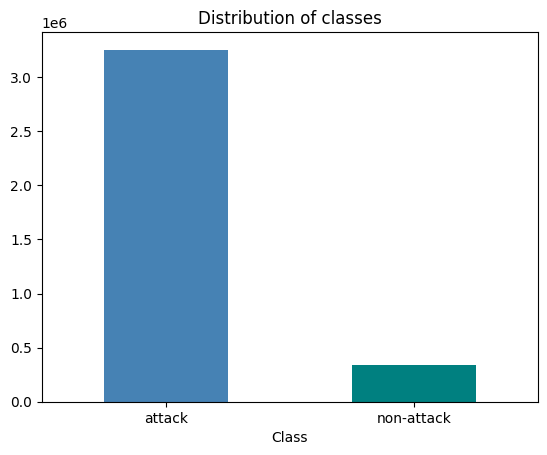

In [98]:
plt.figure()
plt.title("Distribution of classes")
data.tag.value_counts().plot(kind="bar", color=['steelblue','teal'])
plt.xticks(np.arange(2), ['attack','non-attack'],rotation = 360)
plt.xlabel("Class")
plt.show()

# Calcular métricas de rendieminto de los modelos

Función para calcular las métricas de redimiento de los modelos de aprendizaje automático:
- accuracy
- precision_1, precision_0, precision_avg
- recall_1, recall_0, recall_avg
- f1_score_1, f1_score_0, f1_score_avg
- confusion_matrix

In [99]:
def calculate_metrics(y_true, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision_1 = metrics.precision_score(y_true, y_pred)
    precision_0 = metrics.precision_score(y_true, y_pred, pos_label=0)
    precision_avg = metrics.precision_score(y_true, y_pred, average='macro')
    recall_1 = metrics.recall_score(y_true, y_pred)
    recall_0 = metrics.recall_score(y_true, y_pred, pos_label=0)
    recall_avg = metrics.recall_score(y_true, y_pred, average='macro')
    f1_score_1 = metrics.f1_score(y_true, y_pred)
    f1_score_0 = metrics.f1_score(y_true, y_pred, pos_label=0)
    f1_score_avg = metrics.f1_score(y_true, y_pred, average='macro')
    return [accuracy, precision_1, precision_0, precision_avg, recall_1, recall_0, recall_avg, f1_score_1, f1_score_0, \
           f1_score_avg, confusion_matrix]

Tabla de resulatdos de las métricas 

In [100]:
metric_dt = calculate_metrics(data.tag, data.prediction_dt)
metric_rf = calculate_metrics(data.tag, data.prediction_rf)
metric_lr = calculate_metrics(data.tag, data.prediction_lr)
metric_svm_linear = calculate_metrics(data.tag, data.prediction_svm_linear)

df_metric = pd.DataFrame(index=['DT','RF','LR','SVM_LINEAR'], columns=['Accuracy', 'Precision_1', 'Precision_0', 'Precision_avg', 
'Recall_1', 'Recall_0', 'Recall_avg', 'F1_score_1', 'F1_score_0', 'F1_score_avg', 'Confusion_matrix'])

df_metric.loc['DT'] = metric_dt
df_metric.loc['RF'] = metric_rf
df_metric.loc['LR'] = metric_lr
df_metric.loc['SVM_LINEAR'] = metric_svm_linear

df_metric

,Accuracy,Precision_1,Precision_0,Precision_avg,Recall_1,Recall_0,Recall_avg,F1_score_1,F1_score_0,F1_score_avg,Confusion_matrix
DT,0.140848,0.957514,0.097729,0.527622,0.053059,0.977562,0.51531,0.100546,0.177693,0.13912,"[[333762, 7661], [3081419, 172658]]"
RF,0.14587,0.960355,0.098196,0.529276,0.058675,0.976914,0.517795,0.110594,0.178454,0.144524,"[[333541, 7882], [3063143, 190934]]"
LR,0.145994,0.918977,0.095862,0.507419,0.061843,0.948032,0.504938,0.115888,0.174118,0.145003,"[[323680, 17743], [3052834, 201243]]"
SVM_LINEAR,0.146285,0.922824,0.096107,0.509466,0.061887,0.950671,0.506279,0.115996,0.174567,0.145281,"[[324581, 16842], [3052691, 201386]]"


### Gráfica de la matriz de confusión para cada modelo

In [101]:
def confusion_matrix_graf(confusion_matrix, title = 'Confusion Matrix'):
    # Confusion martix of train and test
    # Train confusion matrix
    labels= ['non-attack', 'attack']
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix,
                annot=True, cmap=sns.light_palette("blue"), fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)

### Árboles de decisión

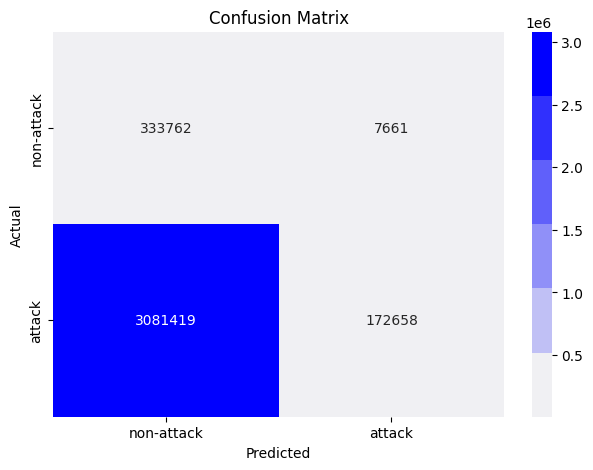

In [102]:
confusion_matrix_graf(metric_dt[-1])

### Bosque aleatorios

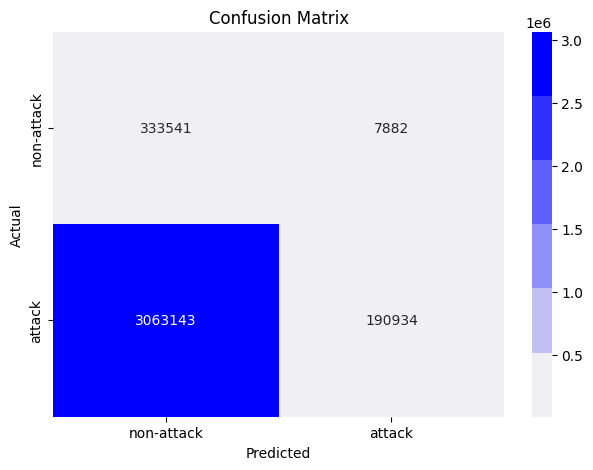

In [103]:
confusion_matrix_graf(metric_rf[-1])

### Regresión Logísticas

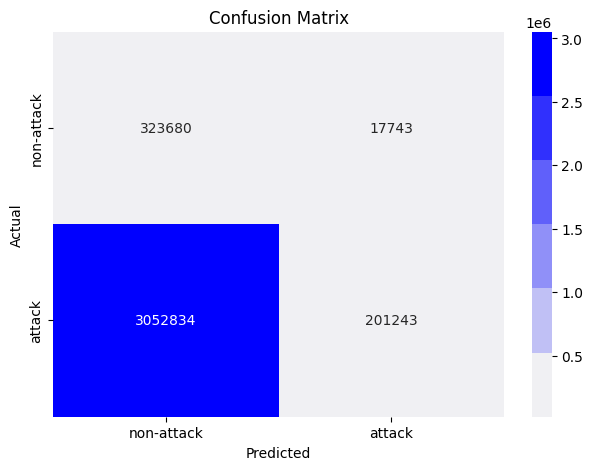

In [18]:
confusion_matrix_graf(metric_lr[-1])

### Máquinas de soporte vectorial lineal

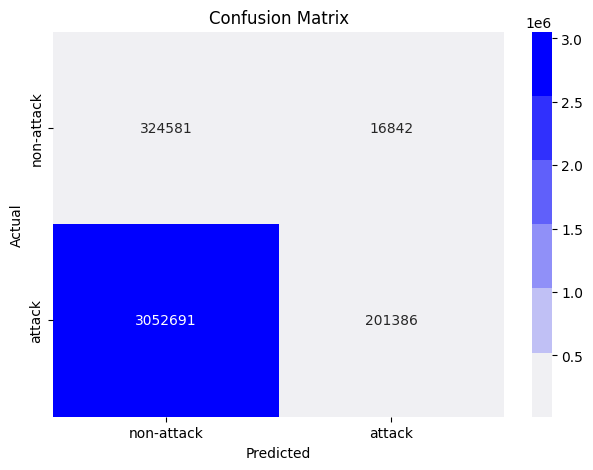

In [19]:
confusion_matrix_graf(metric_svm_linear[-1])

# Comprobación de los resultados

Cargar parametros de estandarización de los datos

In [104]:
scaler = pickle.load(open('standardization_parameters/scaler_all.pkl', 'rb'))

c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Estandarizando los datos

In [105]:
X_data[X_data.columns] = scaler.transform(X_data[X_data.columns])
X_data

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
0,3.657175,-0.882648,-0.136129,-0.076396,-1.186534,3.657174,-0.320667,-0.100343,-0.152003,-0.018914,-0.120690,-0.167037,-0.190512,-0.434252,-0.492495,-0.538903,-0.322656,-0.206595,-0.214689,-1.091626,-0.656339,-0.142841,-0.077484
1,3.657175,-0.882648,-0.133208,-0.076084,-1.186534,3.657174,-0.320667,-0.100343,-0.145579,-0.018914,-0.120105,-0.167037,-0.174651,-0.434252,-0.440587,-0.538903,-0.262912,-0.206595,-0.217627,-0.840084,-0.656339,-0.075372,-0.089702
2,3.657175,-0.882648,-0.098162,-0.063415,-1.186534,3.657175,-0.240584,-0.082852,-0.094192,-0.007614,-0.109727,-0.167037,-0.174651,-0.434252,-0.440587,-0.538903,-0.262912,-0.206595,-0.217627,-0.840084,-0.656339,-0.231961,-0.089702
3,3.657175,-0.882648,-0.133208,-0.075496,-1.186534,3.657174,-0.320669,-0.100343,-0.145579,-0.018914,-0.119005,-0.167037,-0.174651,-0.434252,-0.440587,-0.538903,-0.262912,-0.206595,-0.217627,-0.840084,-0.656339,-0.229878,-0.089702
4,3.657175,-2.847096,-0.139050,-0.077109,-0.626764,3.657174,-0.320675,-0.100343,-0.158426,-0.018944,-0.121989,-0.183405,-0.191074,-0.498825,-0.497037,-0.566113,-0.314912,9.824484,10.895070,-1.137361,-1.098235,-0.231975,-0.089772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595495,3.678458,-2.847096,-0.136129,-0.076921,-1.186534,3.678457,-0.248064,-0.100343,-0.152003,-0.018944,-0.121638,-0.183362,-0.191029,-0.498145,-0.496388,-0.565587,-0.309380,-0.206621,-0.217654,-1.137361,-1.098235,-0.231979,-0.089783
3595496,3.678458,3.046249,-0.136129,-0.076909,0.492775,3.678457,-0.182361,-0.095970,-0.158426,-0.018627,-0.121989,-0.183359,-0.190467,-0.498145,-0.488602,-0.565938,-0.309380,-0.206625,-0.217654,-0.931554,-1.098235,-0.231987,-0.089811
3595497,3.678458,-0.882648,-0.133208,-0.076602,2.172084,3.678457,-0.232359,-0.091597,-0.158426,-0.018141,-0.121989,1.287466,-0.190218,0.486759,-0.490548,-0.160945,-0.319890,-0.206368,-0.217634,-1.114493,-0.263543,-0.231985,-0.089805
3595498,3.678458,1.081801,-0.139050,-0.075977,2.172084,3.678457,-0.320675,-0.100343,-0.158426,-0.017150,-0.121989,-0.182843,-0.183415,-0.498145,-0.474976,-0.554000,-0.308827,9.824484,-0.217621,-0.702879,-1.073686,-0.231953,-0.089703


Nota: Preguntar por la estandarización en este punto.

In [107]:
X_data.describe()

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
count,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06,3.595500e+06
mean,3.669751e+00,-8.693668e-01,-5.971879e-02,3.082934e-02,5.994951e-01,3.669750e+00,-2.738593e-01,-4.364801e-02,-6.683141e-02,1.768878e-02,5.243823e-02,8.840466e-02,7.819627e-03,3.243107e-01,2.654463e-01,-2.635250e-01,3.377432e-01,5.550052e-02,1.867626e-03,9.524774e-01,1.126534e+00,9.459279e-02,1.267312e+00
std,7.553790e-03,4.838142e-01,2.544886e+00,3.217660e+00,1.295010e+00,7.553787e-03,5.305367e-02,3.595813e+00,1.251913e+00,6.251767e+00,4.801288e+00,3.439120e+00,2.397990e+00,1.451233e+00,1.123002e+00,7.520384e-01,1.250034e+00,1.813231e+00,1.792481e+00,4.787503e-01,5.495674e-01,2.378551e+00,8.963432e+00
min,3.657175e+00,-2.847096e+00,-1.390495e-01,-7.710861e-02,-1.186534e+00,3.657174e+00,-3.206749e-01,-1.047160e-01,-1.584262e-01,-1.924136e-02,-1.219886e-01,-1.834050e-01,-1.910740e-01,-4.988249e-01,-4.970370e-01,-5.682198e-01,-3.276350e-01,-2.066252e-01,-2.176583e-01,-1.137361e+00,-1.098235e+00,-2.319921e-01,-8.982628e-02
25%,3.666755e+00,-8.826478e-01,-1.156851e-01,-7.560863e-02,-6.699442e-02,3.666754e+00,-3.205791e-01,-8.722464e-02,-1.327325e-01,-1.805188e-02,-1.205846e-01,-1.404697e-01,-1.469360e-01,6.397754e-02,3.956184e-02,-4.067143e-01,1.265296e-01,-2.065921e-01,-2.176230e-01,1.035050e+00,1.233993e+00,-2.319577e-01,-8.970804e-02
50%,3.668383e+00,-8.826478e-01,-1.010824e-01,-7.037746e-02,-6.699442e-02,3.668382e+00,-2.982386e-01,-8.285179e-02,-1.070388e-01,-1.581169e-02,-1.135178e-01,-3.296748e-02,-3.448888e-02,4.140298e-01,3.795591e-01,-3.228016e-01,4.186111e-01,-2.064896e-01,-2.175122e-01,1.103653e+00,1.307642e+00,-2.318010e-01,-8.932550e-02
75%,3.677832e+00,-8.826478e-01,-9.816182e-02,-7.011497e-02,2.731854e+00,3.677831e+00,-2.159260e-01,-7.847895e-02,-9.419198e-02,-1.543502e-02,-1.127690e-01,-2.176807e-02,-2.308395e-02,4.894779e-01,4.463907e-01,-3.055978e-01,4.766955e-01,-2.058262e-01,-2.169064e-01,1.126520e+00,1.332192e+00,-1.931034e-01,-8.698057e-02
max,3.678458e+00,5.010698e+00,1.431305e+03,8.623801e+02,7.210010e+00,3.678457e+00,1.439007e+00,2.143154e+03,2.182058e+02,4.003368e+03,1.603485e+03,2.647612e+02,2.748977e+02,3.326476e+02,3.175224e+02,8.547351e+01,2.708037e+02,2.988671e+01,3.312053e+01,1.126520e+00,1.332192e+00,5.771919e+01,1.108071e+02


Cargar los modelos de aprendizaje automático entrenados

In [108]:
model_dt = pickle.load(open("models/model_clf_DT.pkl", 'rb'))
model_rf = pickle.load(open("models/model_clf_RF.pkl", 'rb'))
model_lr = pickle.load(open("models/model_clf_LR.pkl", 'rb'))
model_svm_linear = pickle.load(open("models/model_clf_SVM_Linear.pkl", 'rb'))

c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SGDClassifier from version

Calculando las predicciones de los modelos para este conjunto de datos

In [109]:
pred_dt = model_dt.predict(X_data)
pred_rf = model_rf.predict(X_data)
pred_lr = model_lr.predict(X_data)
pred_svm_linear = model_svm_linear.predict(X_data)

Validando si la prediccion entregada por el microservicio en tiempo real coincide con la predicción recalculada

In [110]:
print("Árboles de decisión: ",(pred_dt == data.prediction_dt).all())
print("Bosques aleatorios: ",(pred_rf == data.prediction_rf).all())
print("Regresión logistica: ",(pred_lr == data.prediction_lr).all())
print("Máuinas de soporte vectorial: ",(pred_svm_linear == data.prediction_svm_linear).all())

Árboles de decisión:  False
Bosques aleatorios:  False
Regresión logistica:  False
Máuinas de soporte vectorial:  False


Por ejemplo, en el caso de árboles de decisión

Para los 100 primeros datos se tiene en tiempo real la siguiente predicción:

In [ ]:
data.prediction_dt.head(100).value_counts()

0    100
Name: prediction_dt, dtype: int64

Para los 100 primeros datos la predicción recalculada es:

In [113]:
unique, counts = np.unique(model_dt.predict(X_data.head(100)), return_counts=True)
result = np.column_stack((unique, counts))
result

array([[ 0, 70],
       [ 1, 30]], dtype=int64)

Recalculando métricas de rendimiento

In [ ]:
metric_dt = calculate_metrics(data.tag, pred_dt)
metric_rf = calculate_metrics(data.tag, pred_rf)
metric_lr = calculate_metrics(data.tag, pred_lr)
metric_svm_linear = calculate_metrics(data.tag, pred_svm_linear)

df_metric = pd.DataFrame(index=['DT','RF','LR','SVM_LINEAR'], columns=['Accuracy', 'Precision_1', 'Precision_0', 'Precision_avg', 
'Recall_1', 'Recall_0', 'Recall_avg', 'F1_score_1', 'F1_score_0', 'F1_score_avg', 'Confusion_matrix'])

df_metric.loc['DT'] = metric_dt
df_metric.loc['RF'] = metric_rf
df_metric.loc['LR'] = metric_lr
df_metric.loc['SVM_LINEAR'] = metric_svm_linear

df_metric

,Accuracy,Precision_1,Precision_0,Precision_avg,Recall_1,Recall_0,Recall_avg,F1_score_1,F1_score_0,F1_score_avg,Confusion_matrix
DT,0.912725,0.936319,0.561093,0.748706,0.969505,0.371554,0.67053,0.952623,0.447064,0.699844,"[[126857, 214566], [99232, 3154845]]"
RF,0.929551,0.940807,0.729766,0.835286,0.984075,0.409887,0.696981,0.961954,0.524935,0.743445,"[[139945, 201478], [51822, 3202255]]"
LR,0.907551,0.907474,0.934084,0.920779,0.999789,0.028431,0.51411,0.951398,0.055182,0.50329,"[[9707, 331716], [685, 3253392]]"
SVM_LINEAR,0.908745,0.908406,1.0,0.954203,1.0,0.038999,0.519499,0.952005,0.075069,0.513537,"[[13315, 328108], [0, 3254077]]"


Árboles de decisión

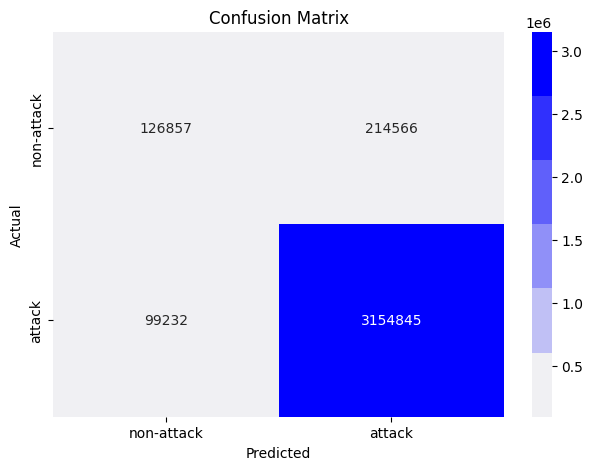

In [123]:
confusion_matrix_graf(metric_dt[-1])

Bosques aleatorios

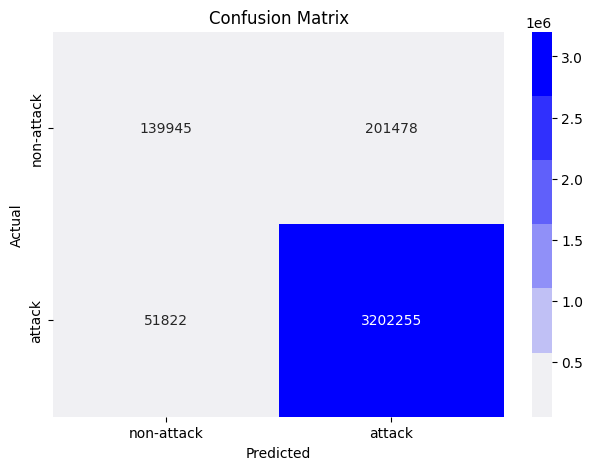

In [124]:
confusion_matrix_graf(metric_rf[-1])

Regresion logísticas

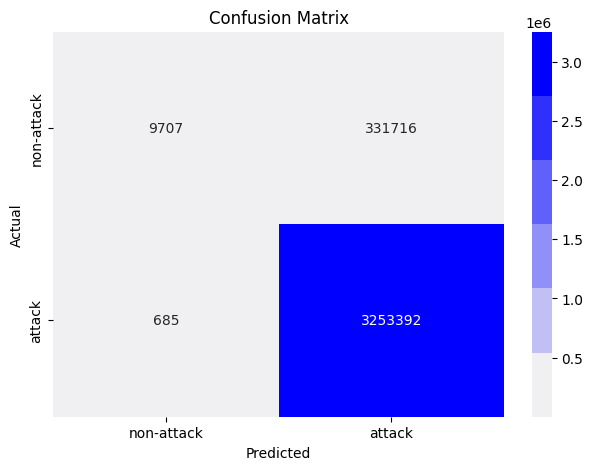

In [125]:
confusion_matrix_graf(metric_lr[-1])

Máquinas de soporte vectorial

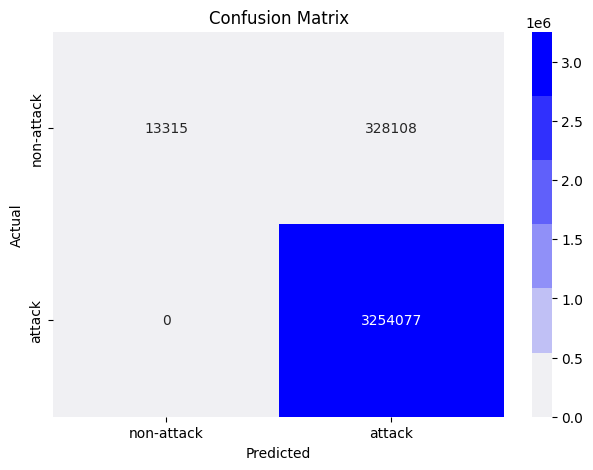

In [126]:
confusion_matrix_graf(metric_svm_linear[-1])

Realizar Filtros DataFrame

In [86]:
#data[(data.tag == 1) & (data.saddr=='9.9.9.9') & (data.saddr=='192.168.100.13') ]
#data.loc[(data.tag == 1) & ((data.saddr=='9.9.9.9') | (data.saddr=='192.168.100.13') | (data.saddr=='192.168.100.12'))]
#data.loc[((data.saddr=='9.9.9.9') | (data.saddr=='192.168.100.13') | (data.saddr=='192.168.100.12'))&(data.tag == 1) & (data.dport == 80) ]
#data.head(100).loc[(data.saddr=='9.9.9.9') | (data.saddr=='192.168.100.13') | (data.saddr=='192.168.100.12')]
#data.loc[data.tag == 1].shape
#3254077

# Datos de prueba usados en la evaluacion de los modelos

In [34]:
x_test, y_test = pickle.load(open("data_base/final_test_all.pkl", 'rb'))

In [35]:
x_test

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
0,1.528096e+09,1,3,274,4,1.528096e+09,0.375890,2,1,214,60,19556,23560,210,236,236,236,8.215870,9.233080,100,74,7.981060,9.233080
1,1.528081e+09,1,5,770,6,1.528081e+09,56.412720,5,0,770,0,77000,77000,500,500,500,500,0.088630,0.088630,100,100,0.088633,0.088630
2,1.528096e+09,1,9,1010,4,1.528096e+09,39.707935,7,2,890,120,92480,92480,758,758,758,758,0.191043,0.191043,100,100,0.226655,0.191043
3,1.528081e+09,1,5,770,6,1.528081e+09,25.359570,5,0,770,0,81800,81800,580,580,580,580,0.228691,0.228691,100,100,0.197164,0.228691
4,1.528096e+09,1,1,154,6,1.528096e+09,0.000000,1,0,154,0,15400,15400,100,100,100,100,0.000000,0.000000,100,100,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,1.528081e+09,1,5,770,6,1.528081e+09,33.263756,5,0,770,0,77000,77000,500,500,500,500,0.150302,0.150302,100,100,0.150314,0.150302
119996,1.424240e+09,2,4,324,0,1.424240e+09,0.001024,2,2,146,178,95530,243338,278,784,162,104,237.459187,4315.659679,11,6,3906.250000,20.692910
119997,1.424259e+09,1,32,11852,2,1.424259e+09,1.078041,14,18,1684,10168,264340,339450,474,892,6838,306,59.374610,106.371802,10,10,29.683472,33.162079
119998,1.528096e+09,1,6,736,4,1.528096e+09,11.138826,5,1,676,60,69160,69160,526,526,526,526,0.472126,0.472126,100,100,0.538656,0.472126


In [36]:
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])
x_test

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
0,0.997893,-0.882648,-0.133208,-0.076440,1.052545,0.997892,-0.309685,-0.095970,-0.152003,-0.018181,-0.121638,-0.169440,-0.173594,-0.356765,-0.344557,-0.526966,-0.197637,-0.206547,-0.217560,1.126520,0.693898,-0.231904,-0.089500
1,0.997619,-0.882648,-0.127367,-0.074890,2.172084,0.997620,1.328709,-0.082852,-0.158426,-0.015425,-0.121989,-0.128293,-0.133845,-0.159648,-0.173261,-0.480621,-0.051596,-0.206628,-0.217662,1.126520,1.332192,-0.231996,-0.089838
2,0.997893,-0.882648,-0.115685,-0.074140,1.052545,0.997894,0.840298,-0.074106,-0.145579,-0.014830,-0.121287,-0.117204,-0.122331,0.015718,-0.005858,-0.435329,0.091126,-0.206627,-0.217661,1.126520,1.332192,-0.231994,-0.089834
3,0.997619,-0.882648,-0.127367,-0.074890,2.172084,0.997619,0.420783,-0.082852,-0.158426,-0.015425,-0.121989,-0.124854,-0.130275,-0.105271,-0.121353,-0.466577,-0.007341,-0.206627,-0.217660,1.126520,1.332192,-0.231994,-0.089833
4,0.997892,-0.882648,-0.139050,-0.076815,2.172084,0.997892,-0.320675,-0.100343,-0.158426,-0.018478,-0.121989,-0.172417,-0.179664,-0.431533,-0.432801,-0.550840,-0.272870,-0.206629,-0.217663,1.126520,1.332192,-0.231997,-0.089841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,0.997619,-0.882648,-0.127367,-0.074890,2.172084,0.997619,0.651884,-0.082852,-0.158426,-0.015425,-0.121989,-0.128293,-0.133845,-0.159648,-0.173261,-0.480621,-0.051596,-0.206628,-0.217661,1.126520,1.332192,-0.231995,-0.089836
119996,-0.981901,1.081801,-0.130288,-0.076284,-1.186534,-0.981901,-0.320645,-0.095970,-0.145579,-0.018518,-0.120947,-0.115019,-0.010120,-0.310544,0.011012,-0.539956,-0.270657,-0.204247,-0.169704,-0.908686,-0.975486,-0.186722,-0.089076
119997,-0.981526,-0.882648,-0.048512,-0.040259,-0.066994,-0.981526,-0.289155,-0.043496,-0.042805,-0.010895,-0.062506,0.005900,0.061370,-0.177321,0.081088,0.632012,-0.158914,-0.206034,-0.216481,-0.931554,-0.877287,-0.231653,-0.088615
119998,0.997893,-0.882648,-0.124447,-0.074996,1.052545,0.997893,0.005000,-0.082852,-0.152003,-0.015891,-0.121638,-0.133908,-0.139676,-0.141976,-0.156391,-0.476056,-0.037213,-0.206625,-0.217658,1.126520,1.332192,-0.231991,-0.089824


In [43]:
x_test.describe()

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,0.000925,-0.003181,0.002649,0.004595,0.003117,0.000925,-0.002728,0.000654,0.004864,0.003101,0.004940,-0.000625,-0.001424,-0.001702,-0.003047,-0.002549,-0.000389,0.000104,-0.000221,0.002142,0.002870,-0.001665,0.003035
std,1.000003,0.999103,1.295886,1.377535,1.001459,1.000003,0.935525,1.129631,1.377475,1.247182,1.344873,1.028673,0.958749,1.021642,0.896726,0.964200,0.968353,1.001560,1.002271,1.000494,1.000280,0.995044,1.047069
min,-1.025976,-2.847096,-0.139050,-0.077109,-1.186534,-1.025976,-0.320675,-0.104716,-0.158426,-0.019241,-0.121989,-0.183398,-0.191067,-0.498825,-0.497037,-0.568220,-0.327635,-0.206629,-0.217663,-1.137361,-1.098235,-0.231997,-0.089841
25%,-0.982214,-0.882648,-0.127367,-0.075984,-0.626764,-0.982214,-0.320227,-0.087225,-0.158426,-0.017160,-0.121989,-0.155385,-0.159045,-0.261605,-0.238146,-0.496069,-0.275082,-0.206625,-0.217658,-0.954421,-0.901837,-0.231992,-0.089827
50%,0.964524,-0.882648,-0.118606,-0.074890,-0.066994,0.964524,-0.287057,-0.074106,-0.152003,-0.016059,-0.121638,-0.130929,-0.133637,-0.097114,-0.097994,-0.427956,-0.077042,-0.206298,-0.217287,-0.771481,-0.729989,-0.231729,-0.088849
75%,0.997892,1.081801,-0.048512,-0.056434,-0.066994,0.997892,0.140679,-0.034750,-0.042805,-0.010895,-0.107574,-0.050575,-0.054111,0.120394,0.143378,0.652376,0.114360,-0.202801,-0.213398,1.126520,1.332192,-0.190677,0.007626
max,1.022389,5.010698,204.463114,224.398532,6.090471,1.022408,78.283967,153.067352,224.847620,187.061867,199.282256,157.683319,163.739032,152.788705,145.831576,39.522371,134.883983,27.020721,22.007802,1.126520,1.332192,22.948479,73.841426


In [135]:
pred_dt = model_dt.predict(x_test)
pred_rf = model_rf.predict(x_test)
pred_lr = model_lr.predict(x_test)
pred_svm_linear = model_svm_linear.predict(x_test)

In [139]:
unique, counts = np.unique(pred_dt, return_counts=True)
result = np.column_stack((unique, counts))
result

array([[    0, 59946],
       [    1, 60054]], dtype=int64)

In [142]:
type(y_test)

pandas.core.series.Series

In [143]:
(pred_dt == y_test).all()

False

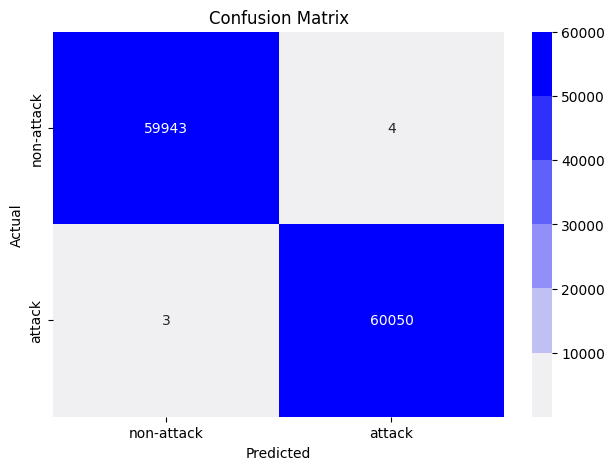

In [136]:
confusion_matrix_graf(metrics.confusion_matrix(y_test,pred_dt))